In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import stats
%matplotlib inline

In [2]:
times, metrics = pickle.load(open('data/run_result.pkl', 'r'))

In [3]:
times = np.array(times)
metrics = np.array(metrics)
print 'seed, method, iter'
print times.shape
print metrics.shape

seed, method, iter
(10, 5, 5)
(10, 5, 5)


In [4]:
labels = ['pb', 'stan', 'prism', 'tm-gibbs', 'tm-vem']

In [5]:
times_metrics = {labels[i]:(times[:,i,:], metrics[:,i,:]) for i in range(5)}

In [6]:
times_metrics['pb'][0].shape

(10, 5)

In [7]:
for k,v in times_metrics.iteritems():
    print k
    print np.average(v[0], axis=0)
    print np.std(v[0], axis=0)
    print np.average(v[1], axis=0)
    print np.std(v[1], axis=0)

pb
[  16.9889313    25.93386148   35.11316225   44.48059322  190.45899516]
[ 0.72989594  0.95744095  1.39826871  1.84298937  9.08592767]
[ 24.80254157  24.29698553  23.88196712  23.55611522  22.19136306]
[ 0.05480538  0.07385655  0.07654158  0.07716148  0.04631052]
stan
[  63.25764884   63.9141014    64.52990539   65.30791031  443.42265173]
[  2.26419168   2.23951725   2.30491186   2.46839781  37.85503043]
[ 26.37663607  26.37663607  26.37663607  26.37663607  22.60287509]
[ 0.62434377  0.62434377  0.62434377  0.62434377  0.0324556 ]
prism
[ 2.76928722  2.94329615  3.09202623  3.24756438  5.98553388]
[ 0.15200604  0.1761801   0.14806075  0.15947425  0.38413645]
[ 24.99762173  24.96110741  24.02612685  22.64161197  21.95231308]
[ 0.00012477  0.00535548  0.10833844  0.10567827  0.08408087]
tm-gibbs
[ 0.62733441  0.748677    0.86694145  0.99133853  2.90123597]
[ 0.03063926  0.03035266  0.03383741  0.05768986  0.1992209 ]
[ 24.32895515  23.04535144  22.59911659  22.40155282  22.18729366]
[ 

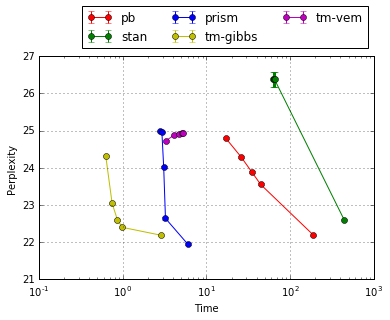

In [18]:
plt.xlabel('Time')
plt.ylabel('Perplexity')
plt.grid()
colors = ['r', 'g', 'b', 'y', 'm']
for c, (k,v) in zip(colors, times_metrics.iteritems()):
    x = np.average(v[0], axis=0)
    #print x.shape
    y = np.average(v[1], axis=0)
    y_err = stats.sem(v[1])
    #print y_err.shape
    #plt.semilogx(x, y, color=c, label=k, marker='o')
    
    plt.errorbar(x,y, yerr = y_err, color=c, label=k, marker='o')
    plt.xscale("log")
    #plt.fill_between(x, y-y_err, y+y_err, color=c, alpha=0.3)
lgd = plt.legend(ncol=3, bbox_to_anchor=(1, 1.25))
plt.savefig('data/lls.pdf', format='pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')